<a href="https://colab.research.google.com/github/Uditi131995/AirplanePricePrediction/blob/main/AirplanePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flight Fare Prediction**

In [1]:
#Importing Libaries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Data Loading
1.   Load the dataset using pandas read_excel.
2.   It is critical to check the complete information of data after loading because it can indicate many hidden information such as null values, duplicate values in a column or row.
3.  Understand the data type of each features present in the dataset. 
4.  Describe data --> which can give statistical analysis.





In [2]:
#Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the data 
data = pd.read_csv('/content/drive/MyDrive/Cleaned_2018_Flights.csv')

In [ ]:
#Display the data
data.head()

,Unnamed: 0,ItinID,MktID,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,0,20181767585,2018176758501,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,672.87
1,1,20181767586,2018176758601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,367.68
2,2,20181767587,2018176758701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,417.94
3,3,20181767636,2018176763601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,247.10
4,4,20181767637,2018176763701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,276.35


In [ ]:
#Number of rows present in the dataset 
print('The total number of records present in the dataset=', len(data))

#Presense of duplicated row
print( data.duplicated())

The total number of records present in the dataset= 9534417
0          False
1          False
2          False
3          False
4          False
           ...  
9534412    False
9534413    False
9534414    False
9534415    False
9534416    False
Length: 9534417, dtype: bool


In [ ]:
#Print a concise summary of a DataFrame: Index dtype, Columns, Non-null values and memory usage
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534417 entries, 0 to 9534416
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         9534417 non-null  int64  
 1   ItinID             9534417 non-null  int64  
 2   MktID              9534417 non-null  int64  
 3   MktCoupons         9534417 non-null  int64  
 4   Quarter            9534417 non-null  int64  
 5   Origin             9534417 non-null  object 
 6   OriginWac          9534417 non-null  int64  
 7   Dest               9534417 non-null  object 
 8   DestWac            9534417 non-null  int64  
 9   Miles              9534417 non-null  float64
 10  ContiguousUSA      9534417 non-null  int64  
 11  NumTicketsOrdered  9534417 non-null  float64
 12  AirlineCompany     9534417 non-null  object 
 13  PricePerTicket     9534417 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 1018.4+ MB


In [ ]:
#Descriptive Statistics
data.describe()

,Unnamed: 0,ItinID,MktID,MktCoupons,Quarter,OriginWac,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,PricePerTicket
count,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06,9.534417e+06
mean,4.767208e+06,1.759457e+11,1.759457e+13,1.018007e+00,2.557957e+00,5.466834e+01,5.462018e+01,1.201739e+03,1.944869e+00,2.410631e+00,2.324497e+02
std,2.752349e+06,6.349516e+10,6.349516e+12,1.330694e-01,1.112684e+00,2.801241e+01,2.805461e+01,6.971492e+02,2.282366e-01,2.879671e+00,1.433412e+02
min,0.000000e+00,2.018110e+10,2.018110e+12,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,5.000000e+01
25%,2.383604e+06,2.018135e+11,2.018135e+13,1.000000e+00,2.000000e+00,3.300000e+01,3.300000e+01,6.790000e+02,2.000000e+00,1.000000e+00,1.339100e+02
50%,4.767208e+06,2.018248e+11,2.018248e+13,1.000000e+00,3.000000e+00,4.400000e+01,4.400000e+01,1.028000e+03,2.000000e+00,1.000000e+00,1.971900e+02
75%,7.150812e+06,2.018352e+11,2.018352e+13,1.000000e+00,4.000000e+00,8.200000e+01,8.200000e+01,1.609000e+03,2.000000e+00,2.000000e+00,2.900000e+02
max,9.534416e+06,2.018454e+11,2.018454e+13,3.000000e+00,4.000000e+00,9.300000e+01,9.300000e+01,5.095000e+03,2.000000e+00,2.000000e+01,1.000000e+03


# Data Preprocessing

1.   Check for the presense of missing values.
2.   Drop the unnecessary column
3.   Perform Encoding for Categorical Values: Label Encoding 




***Check for missing values***

In [ ]:
#Check for the presense of the missing values : Since no missing values are present we need not to apply any  strategies.
data.isnull().sum()

Unnamed: 0           0
ItinID               0
MktID                0
MktCoupons           0
Quarter              0
Origin               0
OriginWac            0
Dest                 0
DestWac              0
Miles                0
ContiguousUSA        0
NumTicketsOrdered    0
AirlineCompany       0
PricePerTicket       0
dtype: int64

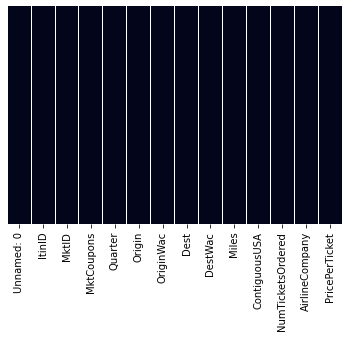

In [ ]:
#No Missing values present 
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

***Remove any unnecessary columns***

In [4]:
#Drop the column unnamed, ItinID, MktID and create a new dataset so that the original dataset is not modified

df=data.drop(['Unnamed: 0', 'ItinID','MktID'], axis=1)

***Encode the categorical attribute: Label Encoding***

In [5]:
#Categorical Attribute: Origin, Des, AirlineCompany

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Origin'. 
df['Origin']= label_encoder.fit_transform(df['Origin']) 
df['Dest']= label_encoder.fit_transform(df['Dest']) 
df['AirlineCompany']= label_encoder.fit_transform(df['AirlineCompany'])

***Display the encoded dataset***

In [ ]:
print(df.head())

   MktCoupons  Quarter  Origin  OriginWac  Dest  DestWac   Miles  \
0           1        1     185         23   128       91  2402.0   
1           1        1     185         23   128       91  2402.0   
2           1        1     185         23   128       91  2402.0   
3           1        1     185         23   128       91  2402.0   
4           1        1     185         23   128       91  2402.0   

   ContiguousUSA  NumTicketsOrdered  AirlineCompany  PricePerTicket  
0              2                1.0               0          672.87  
1              2                1.0               0          367.68  
2              2                1.0               0          417.94  
3              2                1.0               0          247.10  
4              2                1.0               0          276.35  


# Feature Engineering
1. Heatmap
2. Feature Importance
3. SelectKbest

***Heatmap***

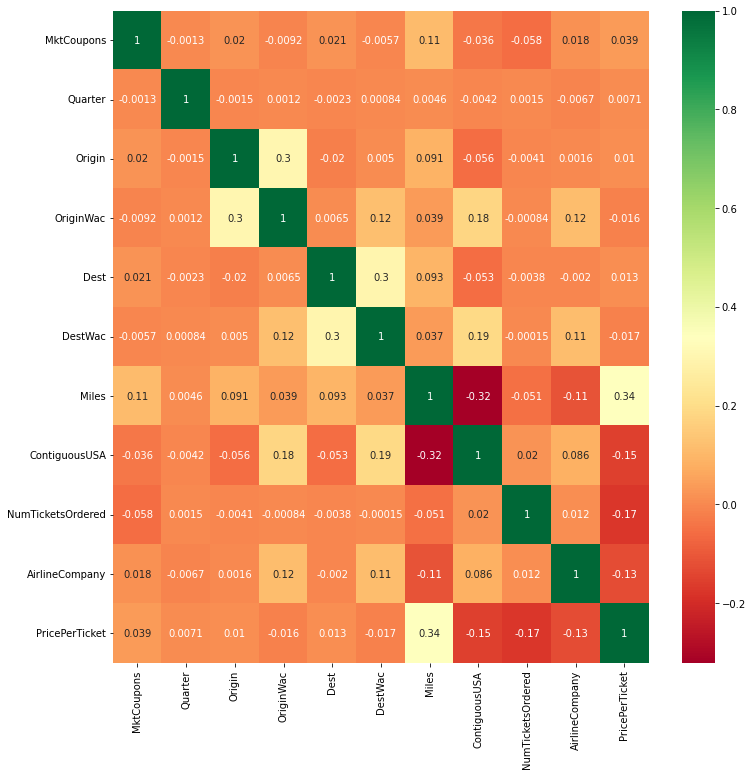

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

***Features Attribute***

In [ ]:
X = df.loc[:, ['MktCoupons','Quarter','Origin', 'OriginWac','Dest','DestWac','Miles','ContiguousUSA','NumTicketsOrdered','AirlineCompany']]
X.head()

,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany
0,1,1,185,23,128,91,2402.0,2,1.0,0
1,1,1,185,23,128,91,2402.0,2,1.0,0
2,1,1,185,23,128,91,2402.0,2,1.0,0
3,1,1,185,23,128,91,2402.0,2,1.0,0
4,1,1,185,23,128,91,2402.0,2,1.0,0


***Target Attribute***

In [6]:
y = df.loc[:,'PricePerTicket']
y.head()

0    672.87
1    367.68
2    417.94
3    247.10
4    276.35
Name: PricePerTicket, dtype: float64

***Feature Importance***

In [ ]:
#We are using XGBRegressor as the data present is huge 
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X,y)

[18:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:55] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor()

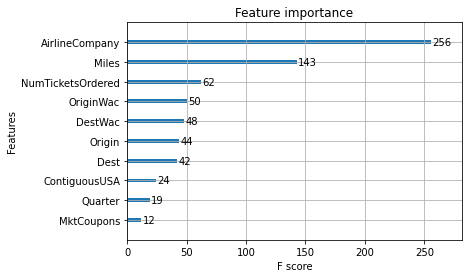

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model)
pyplot.show()

***SelectKBest***

In [ ]:
#For regression: f_regression
#K=6 which means we want to select 6 features

from sklearn.feature_selection import SelectKBest,f_regression

test = SelectKBest(score_func=f_regression, k=6)
fit = test.fit(X, y)

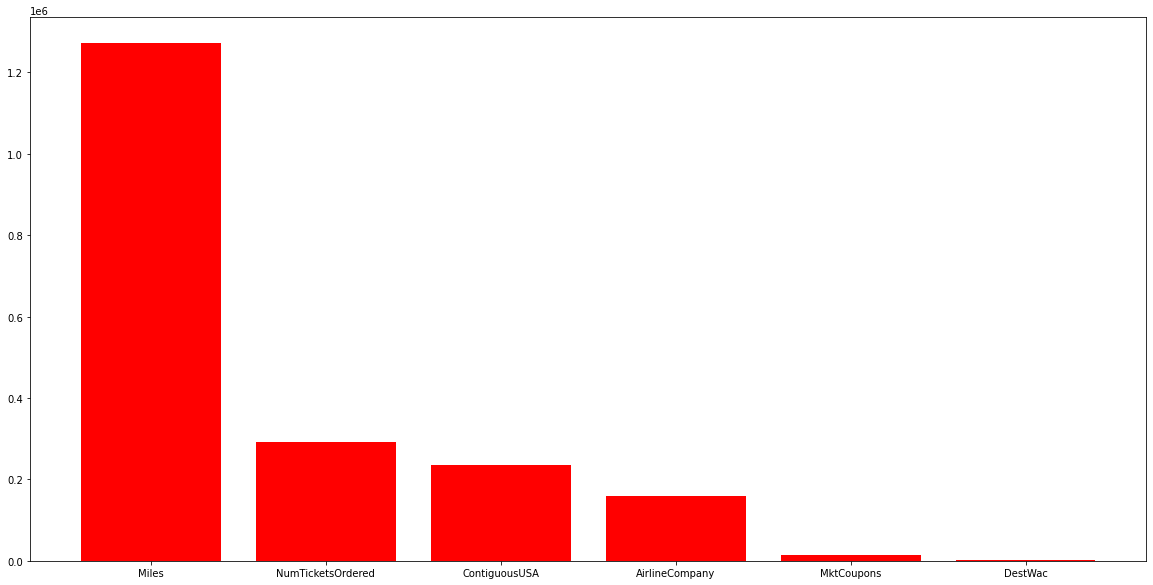

<Figure size 576x360 with 0 Axes>

In [ ]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (20, 10)
indices = np.argsort(fit.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(6):
    features.append(df.columns[indices[i]])

# Now plot
plt.bar(features, fit.scores_[indices[range(6)]], color='r', align='center')
plt.figure(figsize=(8,5))
plt.show()

# Data Preparation

1. New features attribute with the selected important features. 
2. Split the dataset into train and test 

In [7]:
X_new =df.loc[:, ['AirlineCompany', 'Miles','NumTicketsOrdered','OriginWac','DestWac','Origin','Dest','MktCoupons','ContiguousUSA']] 

In [8]:
#Split the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
print (' Training:' +repr(len(X_train)))
print (' Testing:' +repr(len(X_test)))

 Training:7627533
 Testing:1906884


# Models 
1. RandomForestRegressor 
2. XGBRegressor
3. KNeighborsRegressor 

***RandomForestRegressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
print('Training Score :',reg_rf.score(X_train, y_train))
print('Test Score     :',reg_rf.score(X_test, y_test))

Training Score : 0.33626794210174393
Test Score     : 0.3267105760251735


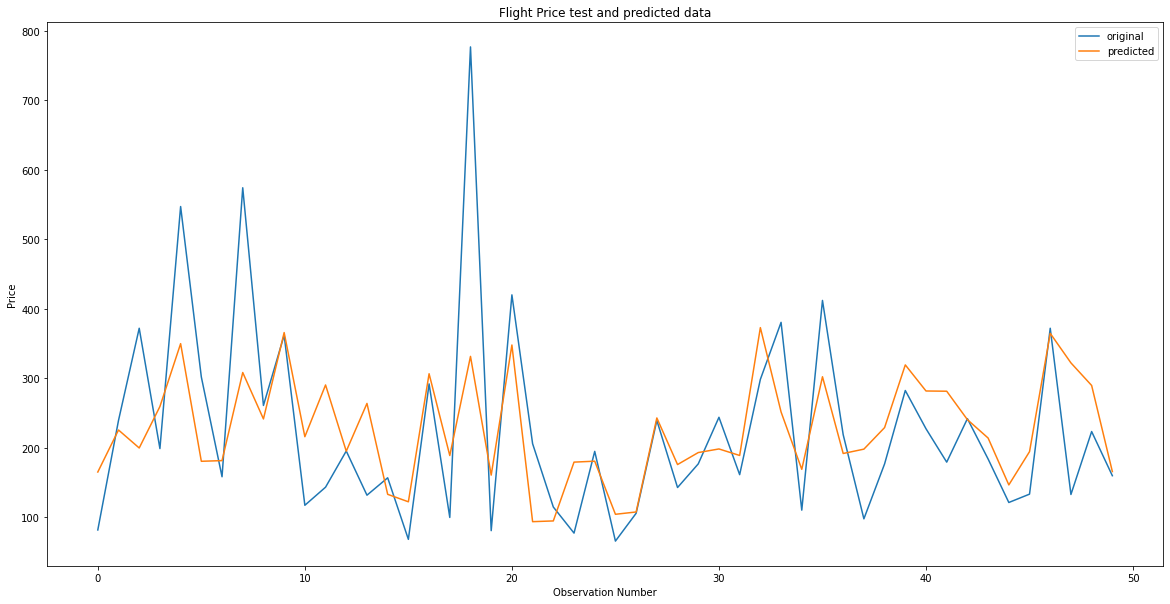

<Figure size 720x360 with 0 Axes>

In [ ]:
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 83.33676839033951
MSE: 13858.580631977722
RMSE: 117.72247292670046


***XGBRegressor***

In [ ]:
from xgboost import XGBRegressor
model =  XGBRegressor()
model.fit(X_train,y_train)

[11:55:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:16] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor()

In [ ]:
y_pred =  model.predict(X_test)
print('Training Score :',model.score(X_train, y_train))
print('Test Score     :',model.score(X_test, y_test))

Training Score : 0.2775257389736373
Test Score     : 0.2773108837676206


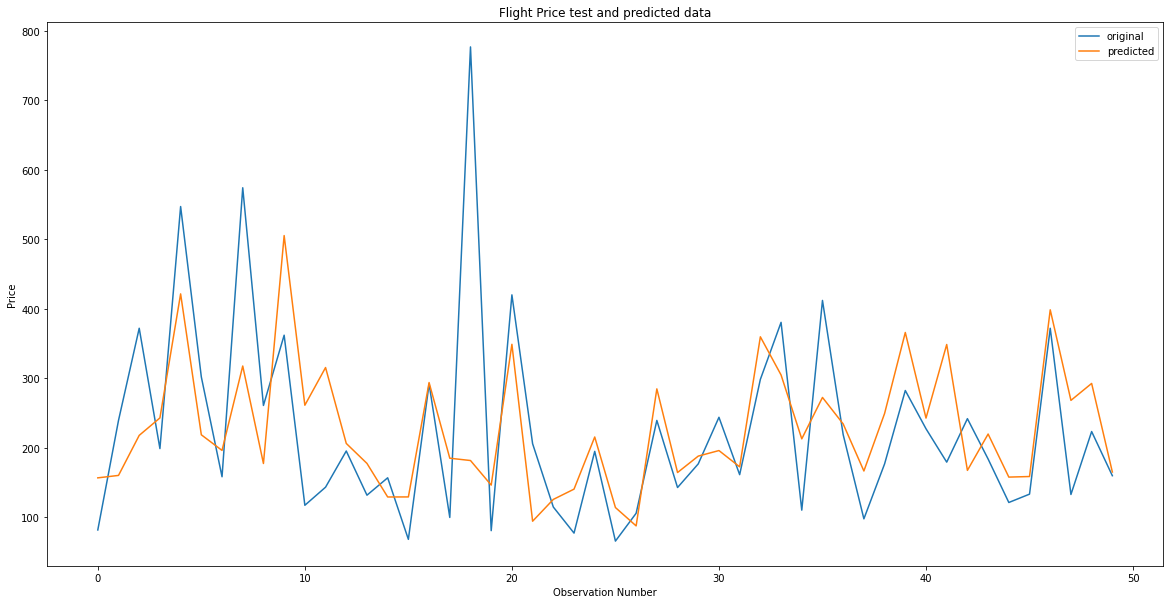

<Figure size 720x360 with 0 Axes>

In [ ]:
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
# Metrics Score 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 87.27457997529935
MSE: 14875.393898261524
RMSE: 121.96472399124889


***KNeighborsRegressor***

In [9]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [10]:
y_pred = neigh.predict(X_test)

In [11]:
print('Training Score :',neigh.score(X_train, y_train))
print('Test Score     :',neigh.score(X_test, y_test))

Training Score : 0.24248948219217525
Test Score     : 0.2351176642458065


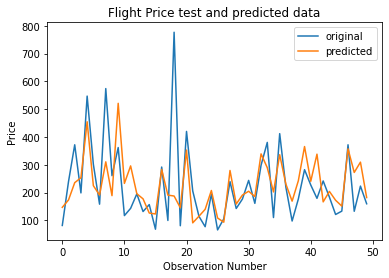

<Figure size 720x360 with 0 Axes>

In [12]:
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

In [13]:
# Metrics Score 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 88.79127669912944
MSE: 15743.873506055957
RMSE: 125.47459306989586


***DecisionTreeRegressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print('Training Score :',regressor.score(X_train, y_train))
print('Test Score     :',regressor.score(X_test, y_test))

Training Score : 0.33642443556203616
Test Score     : 0.325921545031714


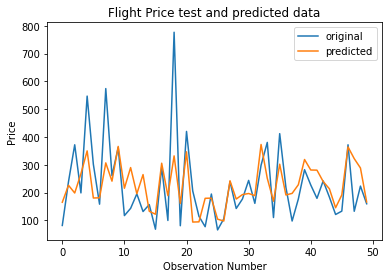

<Figure size 720x360 with 0 Axes>

In [ ]:
number_of_observations=50
x_ax = range(len(y_test[:number_of_observations]))
plt.plot(x_ax, y_test[:number_of_observations], label="original")
plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.legend()
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
# Metrics Score 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 83.38488048249071
MSE: 13874.821566789133
RMSE: 117.7914324846639
